<a href="https://colab.research.google.com/github/NikitaSavvin2000/Load-Balance/blob/NSavvin_develop/poisoon_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import random
format_string = '%Y-%m-%d %H:%M:%S%z'
from datetime import datetime
from datetime import datetime, timedelta

def poisson_value(date_with_nan, df, time_window_minutes=5):
    date_with_nan = datetime.strptime(date_with_nan, format_string)
    # Создайте маску, чтобы выбрать все строки, которые соответствуют условиям месяца, дня, часа и минуты.
    mask = ((df['time'].dt.month == date_with_nan.month) &
              (df['time'].dt.day == date_with_nan.day) &
              (df['time'].dt.hour == date_with_nan.hour) &
              (df['time'].dt.minute >= date_with_nan.minute - time_window_minutes) &
              (df['time'].dt.minute <= date_with_nan.minute + time_window_minutes) &
              (~df['P_l'].isna()))
    # Отфильтруйте строки, чтобы исключить NaN значения в столбце 'P_l'.
    non_nan_values = df.loc[mask, 'P_l'].dropna()
    matching_indices = non_nan_values.index.tolist()
    # Проверьте, что есть хотя бы одно значение без NaN.
    if non_nan_values.empty:
        return []  # Вернуть пустой список, если нет подходящих значений.

    # Вычислите среднее значение для отфильтрованных значений.
    mean_value = non_nan_values.mean()

    # Генерируйте случайные значения Пуассона на основе среднего значения.
    count_index = 100
    s = np.random.poisson(mean_value, count_index).tolist()
    index = random.randint(0, 99)
    poisson_value = s[index]
    return poisson_value


def calculate_mape(df_orig, df_test, drop_index):
    df_test.reset_index(inplace=True)
    df_orig.reset_index(inplace=True)
    df_init = df_orig[df_orig.isin(drop_index)]
    df_mape = df_test[df_test.isin(drop_index)]
    mape = (abs((df_init['P_l'] - df_mape['P_l']) / df_mape['P_l']) * 100).mean()
    return mape


In [111]:
df=pd.read_csv(r'/content/filled_P_l.csv')

In [112]:

percentage_of_missing_values = 10  # например, 10%
total_values = len(df)
num_values_to_remove = int(total_values * percentage_of_missing_values / 100)
drop_index = random.sample(df.index.tolist(), num_values_to_remove)
df_test = df.copy()
df_test.loc[drop_index, 'P_l'] = np.nan
date_with_nan_list = df_test.loc[df_test['P_l'].isna(), 'time'].tolist()


In [113]:
df_test['time'] = pd.to_datetime(df['time'], format=format_string)

In [1]:
from tqdm import tqdm


for date_with_nan in tqdm(date_with_nan_list):
  random_poisson_value = poisson_value(date_with_nan, df_test, time_window_minutes=5)
  df_test.loc[df_test['time'] == date_with_nan, 'P_l'] = random_poisson_value


NameError: ignored

In [105]:
print(drop_index)
print(len(df_test))
print(len(df_test.dropna()))

[318873, 253395, 18612, 216160, 507602, 661393, 582565, 54353, 435330, 339756, 618015, 630237, 386153, 269202, 616789, 312969, 575874, 81288, 552439, 325316, 500904, 351192, 655494, 673147, 471797, 66225, 610825, 416197, 237032, 625320, 591432, 546070, 18140, 585109, 703370, 385761, 108659, 518177, 628113, 117112, 470027, 289400, 323363, 536209, 399841, 109269, 113581, 663247, 396989, 290548, 320684, 751370, 416566, 233102, 635605, 432077, 576361, 730262, 115020, 60708, 294533, 135513, 315549, 681059, 657037, 656993, 637635, 112374, 101801, 258991, 485504, 471183, 279904, 672512, 587455, 686506]
762891
762891


In [106]:
def calculate_mape(df_orig, df_test, drop_index):
    df_init = df_orig.iloc[drop_index]
    df_mape = df_test.iloc[drop_index]
    mape = (abs((df_init['P_l'] - df_mape['P_l']) / df_mape['P_l']) * 100).mean()
    return mape

In [107]:
mape = calculate_mape(df, df_test, drop_index)
print(mape)

2.9435336422619427


In [108]:
df_test.to_csv('/content/imputed_filled_P_l_LR.csv')

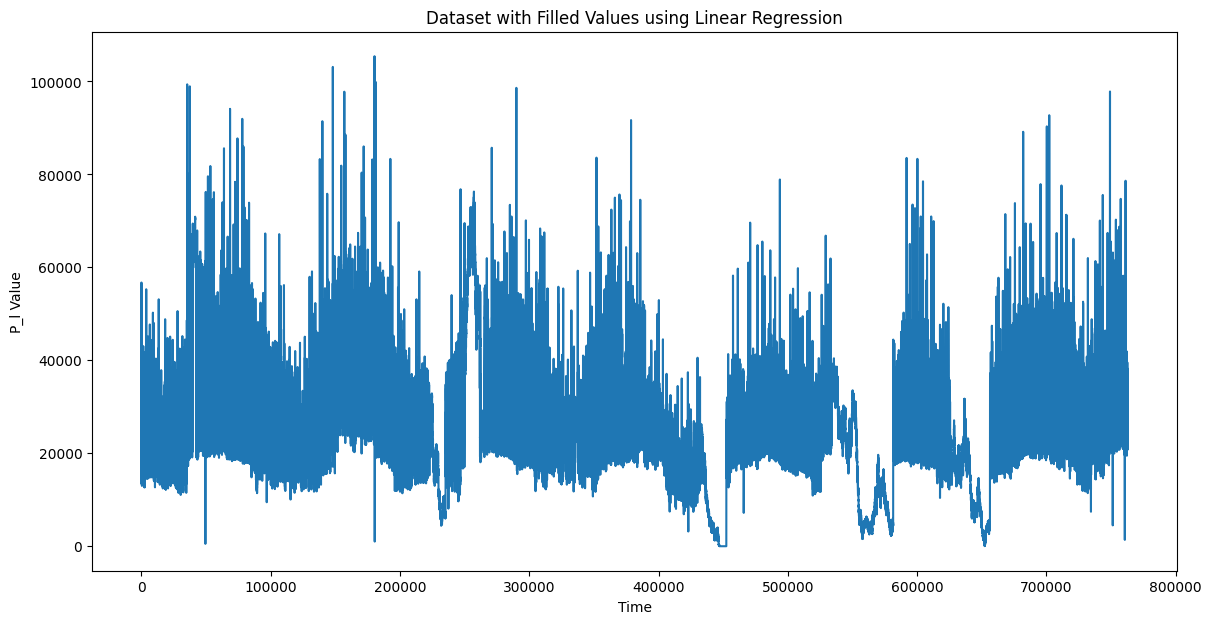

In [109]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
df_test['P_l'].plot(title="Dataset with Filled Values using Linear Regression")
plt.xlabel("Time")
plt.ylabel("P_l Value")
plt.show()

